In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import env
import numpy as np

np.random.seed(999)

In [7]:
#sample size 10
n_dice_per_experiment = ncols = 10
n_experiments = nrows = 100

data = np.random.randint(1,7, (nrows, ncols))

data[:4]

array([[1, 5, 6, 2, 1, 2, 4, 2, 4, 1],
       [6, 6, 1, 1, 1, 6, 3, 4, 4, 6],
       [5, 3, 3, 2, 6, 4, 5, 4, 1, 2],
       [5, 6, 4, 5, 1, 4, 3, 5, 5, 6]])

In [8]:
calculated_averages = data.mean(axis = 1)
calculated_averages

array([2.8, 3.8, 3.5, 4.4, 2.8, 2.9, 3.7, 4.1, 3.3, 3.3, 3.8, 2.7, 3.2,
       3.5, 3.8, 3.6, 3.7, 3.5, 4.4, 4.4, 3.5, 3.2, 3.4, 3.5, 4.1, 3.2,
       4.2, 3.2, 2.4, 3.5, 4. , 3. , 3.5, 2.8, 3.3, 3.6, 4.4, 3. , 3.4,
       3.4, 3. , 3.3, 3.4, 3.9, 3.8, 4. , 3.7, 3. , 3.1, 4. , 3.1, 2.1,
       3.3, 4.2, 3.2, 3.8, 2.9, 3.3, 3.7, 4.2, 3.3, 3.9, 3.7, 2.5, 2.8,
       3.4, 3.2, 3.6, 3.7, 4. , 3.8, 3.7, 4.3, 3.3, 3.7, 2.9, 3.5, 3.8,
       3.5, 3.8, 3.5, 4.3, 2.6, 3.6, 3.4, 3.3, 4.4, 4.1, 3.4, 3.1, 3.6,
       3. , 3.9, 2.1, 4. , 3.8, 5. , 3.5, 3.8, 3.8])

Text(0.5, 1.0, 'Outcome of averaging 10 dice rolls 100 times')

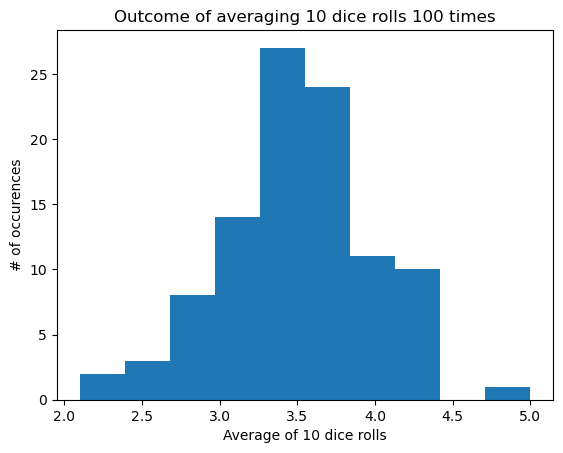

In [9]:
plt.hist(calculated_averages)

plt.xlabel(f'Average of {n_dice_per_experiment} dice rolls')
plt.ylabel('# of occurences')

plt.title(f'Outcome of averaging {n_dice_per_experiment} dice rolls {n_experiments} times')

In [10]:
db_url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/telco_churn'
df = pd.read_sql('SELECT * FROM customers', db_url)  

In [11]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

<AxesSubplot:>

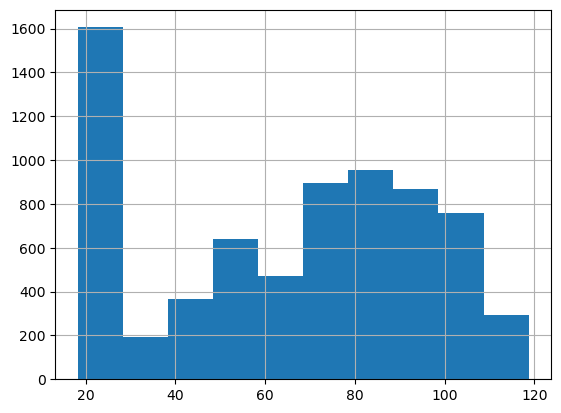

In [12]:
df.monthly_charges.hist()

In [13]:
churn_sample = df[df.churn == 'Yes'].monthly_charges

<AxesSubplot:>

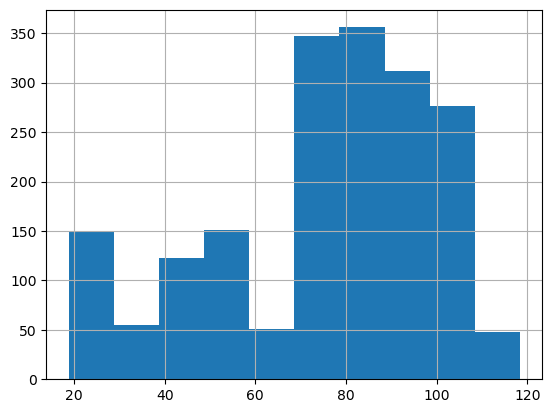

In [14]:
churn_sample.hist()

 H_0: mean of monthly charges of churned customers <= mean of monthly charges of all 
 H_a: mean of monthly charges of churned customers > mean of monthly charges of all customers

#Set an alpha value


## verify assumption of sample size



In [15]:
alpha = 0.05
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [16]:
#compute test stat

In [17]:
churn_sample = df[df.churn == 'Yes'].monthly_charges

#overall mean

overall_mean = df.monthly_charges.mean()

stats.ttest_1samp(churn_sample, overall_mean)

Ttest_1sampResult(statistic=16.96540308050567, pvalue=3.740639299382399e-60)

In [18]:
t, p = stats.ttest_1samp(churn_sample, overall_mean)

In [19]:
print(t, p/2, alpha)

16.96540308050567 1.8703196496911995e-60 0.05


In [20]:
if p/2 > alpha:
    print("We fail to reject null hypothesis")
elif t < 0:
    print('we fail to reject null')
else:
    print("we reject null")

we reject null


# example 2
monthly charges of churned customers are sig diff than overall cust

null: mean of charges for churned = mean of charges for overall cust
alternative: the mean of charges for churned != mean of charges for overall cust

In [21]:
# set up test 
#compute t-stat and p-value

t, p = stats.ttest_1samp(churn_sample, overall_mean)

t, p, alpha

(16.96540308050567, 3.740639299382399e-60, 0.05)

In [22]:
##compare the calculated p-value to alpha

p < alpha

True

In [23]:
if p < alpha: 
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')
    

we reject the null hypothesis


# Example 3
monthly charge of churned customers is less than the mean of all customers

H0: monthly charges for customers who churn is >= monthly charge for all cust  
Ha: monthly charges for custeomrs who churn < monthly charge for all customers

In [24]:
t, p = stats.ttest_1samp(churn_sample, overall_mean)

t, p



(16.96540308050567, 3.740639299382399e-60)

In [25]:
#is p/2 less than alpha

print(p/2 < alpha)

print(t<0)
#to reject the null hypothesis p/2 < alpha AND t < 0

True
False


In [26]:
if (p/2 < alpha)& (t< 0 ):
    print('we reject the null')
else:
    print('we fail to reject the null')

we fail to reject the null


# independent t-test (two sample)

#group A - cust who churned

# example 1

<AxesSubplot:>

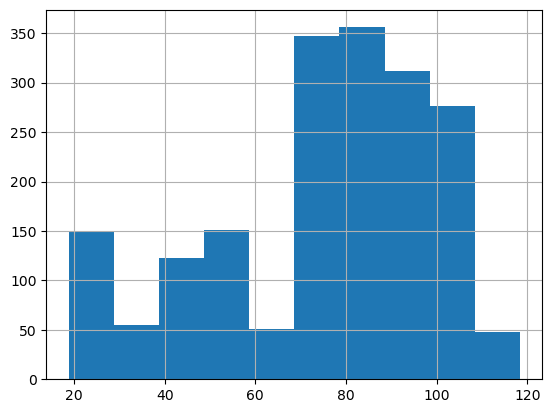

In [27]:
churn_sample = df[df.churn == "Yes"].monthly_charges

churn_sample.hist()

<AxesSubplot:>

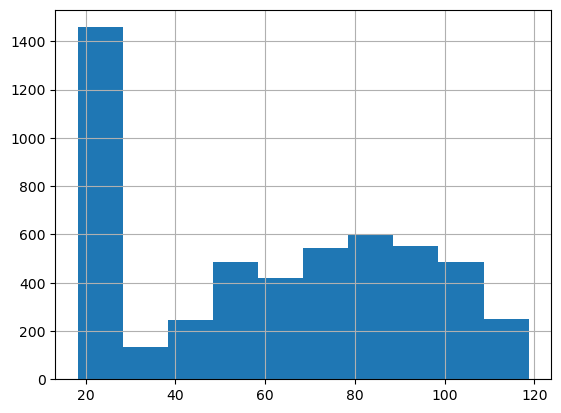

In [28]:
no_churn_sample = df[df.churn == "No"].monthly_charges

no_churn_sample.hist()

H_0: group who churn <= group who do not churn
H_A: monthly charge of group who churn > monthly charges of group who do not churn

b

In [29]:
alpha = 0.05

print(churn_sample.var())

no_churn_sample.var()

#therefore we will use equal_var = False



608.4141833954315


966.7527670734293

In [30]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)


In [31]:
print(t,p/2)

18.407526676414673 4.296224665773525e-73


# Example 2

are monthly charges for customers who churn significantly different than the monthly charges of those who do not churn

H0: charges of customers who churn equals that of those who don't churn.

Ha: charges of customers who churn is not equal to that of those who don't churn.

## two-tailed
-compare p to alpha

In [32]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)

t,p

(18.407526676414673, 8.59244933154705e-73)

In [33]:
# if p is less than α 
p < alpha

True

## example 3

are charge for churned customers significantly less than charges for non-churned customers

H0: mean for churned customers is greater than or equal to the mean for the customers who did not churn
HA: mean for churned customers is less than the mean for cust who did not churn


In [34]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)

t,p/2

(18.407526676414673, 4.296224665773525e-73)

In [35]:
print(t<0)
print((p/2)<alpha)

False
True


# ANOVA: Analysis of Variance

outcome: compare means of groups A, B, and C

1 Plot distro
2 Est hpyothesis

## Format Hypo

  Null hypothesis- mu = mu = mu
  Alt Hypothesis- mu != mu != mu
  
## Verify Assumptions
-norm distro or at least 30 observations
-independent samples
-equal variance

## syntax for test
  scipy.stats.f_oneway
  return: test stats and p-value


In [36]:
df = sns.load_dataset('iris')

In [37]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [38]:
#group A - setosa
#group B - versicolor
#group C - virginica

#summary of sepal length

df.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [39]:
## filter sepal_length

versicolor_sepal_length = df[df.species == 'versicolor'].sepal_length

virginica_sepal_length = df[df.species == 'virginica'].sepal_length

setosa_sepal_length = df[df.species == 'setosa'].sepal_length

In [40]:
#histos

<AxesSubplot:>

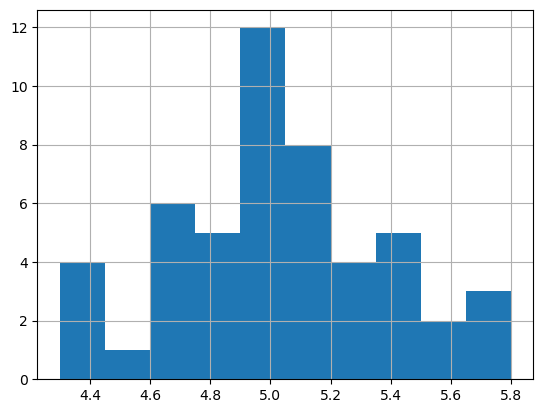

In [41]:
setosa_sepal_length.hist()

<AxesSubplot:>

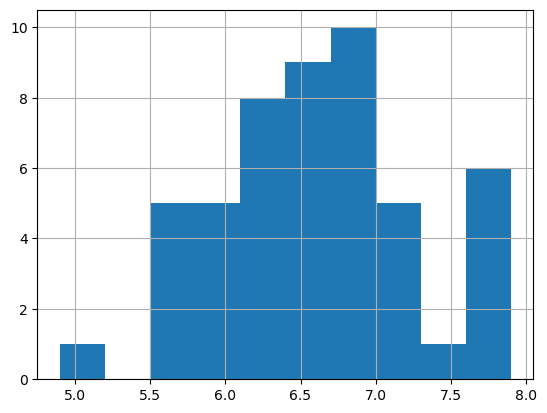

In [42]:
virginica_sepal_length.hist()

<AxesSubplot:>

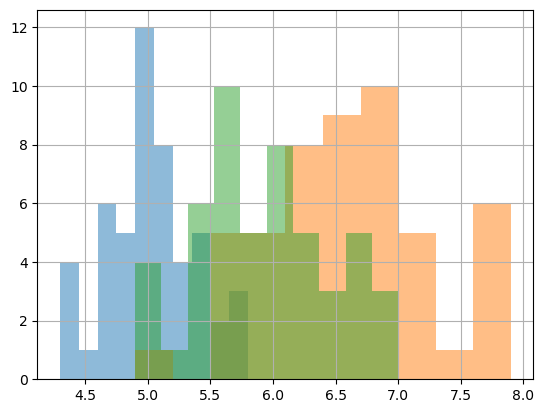

In [43]:
setosa_sepal_length.hist(alpha = 0.5)

virginica_sepal_length.hist(alpha = 0.5)

versicolor_sepal_length.hist(alpha = 0.5)

## Hypothesis

H0: for the mean of sepal_length: all are equal
HA: for the mean of sepal_lenght: not all equal (at least 2)

In [44]:
alpha = 0.05

#independence? YES
#30 samples at least
#equal variances? (use stats.levene)

test for equal variance



In [45]:
print(versicolor_sepal_length.var())
print(virginica_sepal_length.var())
print(setosa_sepal_length.var())

0.2664326530612246
0.40434285714285706
0.12424897959183666


stats.levene will tell us if ANOVA will yield usable results, a p value beneath alpha will indicate that we should use something like Kruskal-Wallis

In [46]:
stats.levene(versicolor_sepal_length, virginica_sepal_length, setosa_sepal_length)

LeveneResult(statistic=6.352720020482689, pvalue=0.0022585277836218586)

In [47]:
stats.f_oneway(versicolor_sepal_length, virginica_sepal_length, setosa_sepal_length) #ANOVA

F_onewayResult(statistic=119.26450218450472, pvalue=1.6696691907693648e-31)

In [48]:
stats.kruskal(versicolor_sepal_length, virginica_sepal_length, setosa_sepal_length)

KruskalResult(statistic=96.93743600064833, pvalue=8.91873433246198e-22)

KW used because no equality in variance  
our takeaway is that there appears to be a significance in difference between at least two groups

# Example 2 ANOVA


In [49]:
df = sns.load_dataset('mpg')

In [50]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [51]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [52]:
df = df[~df.horsepower.isna()]
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [53]:
df.origin.value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

is the horsepower of vehicles different across the distnct origins of the vehicles

H0 : mean horsepower == mean horsepower japan == mean horsepower europe

HA : the mean HP from at least 2 diff coutries are sig diff

1. at least 30 observations: met
2. equal variance across all three groups
3. groups are independent

lets look at the values and histos



<AxesSubplot:>

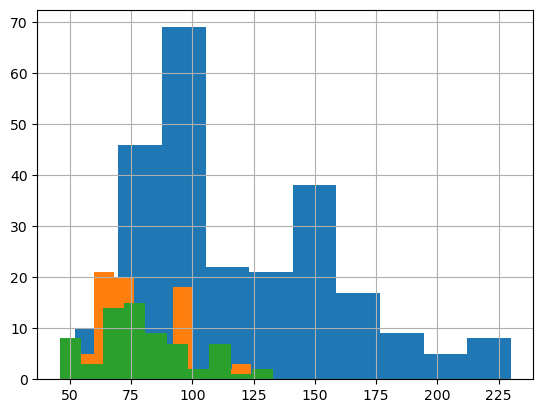

In [54]:
df[df.origin == 'usa'].horsepower.hist()
df[df.origin == 'japan'].horsepower.hist()
df[df.origin == 'europe'].horsepower.hist()


In [55]:
usa = df[df.origin == 'usa'].horsepower
japan = df[df.origin == 'japan'].horsepower
europe = df[df.origin == 'europe'].horsepower
usa

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
392     90.0
393     86.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 245, dtype: float64

In [98]:
#validate variance assumption

stats.levene(usa, japan, europe)

LeveneResult(statistic=26.526632103545772, pvalue=1.5863075873913356e-11)

levene indicates that ANOVA cannot offer a reliable result

In [101]:
stats.kruskal(usa, japan, europe)

KruskalResult(statistic=105.59475799843663, pvalue=1.1759521262123952e-23)

p value < 0.05 indicates a significant difference in at least two vehicle origins


#compare two groups to see sig

H0: hp of USA is same as Japan
HA: they are not equal

In [102]:
stats.ttest_ind(usa, japan, equal_var = False)

Ttest_indResult(statistic=12.092022948407953, pvalue=1.5146320352820458e-27)

In [103]:
stats.ttest_ind(europe, japan, equal_var = False)

Ttest_indResult(statistic=0.22881164651575753, pvalue=0.8193616065509621)